In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier()

pokemon = pd.read_csv("Downloads/pokemon/Pokemon.csv", index_col = '#')
pokemon = pokemon.sort_values(by = "Legendary")
pokemon.insert(1, "Rel Index", [i for i in range(len(pokemon))])


print(pokemon.tail(67))

                        Name  Rel Index    Type 1    Type 2  Total   HP  \
#                                                                         
232                  Donphan        733    Ground       NaN    500   90   
235                 Smeargle        734    Normal       NaN    250   55   
480                     Uxie        735   Psychic       NaN    580   75   
481                  Mesprit        736   Psychic       NaN    580   80   
482                    Azelf        737   Psychic       NaN    580   75   
483                   Dialga        738     Steel    Dragon    680  100   
484                   Palkia        739     Water    Dragon    680   90   
485                  Heatran        740      Fire     Steel    600   91   
486                Regigigas        741    Normal       NaN    670  110   
487    GiratinaAltered Forme        742     Ghost    Dragon    680  150   
487     GiratinaOrigin Forme        743     Ghost    Dragon    680  150   
716                  Xern

In [5]:
types = pokemon['Type 1']
print(types.value_counts())
water = pokemon.loc[pokemon['Type 1'] == 'Water']


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


        Type    Mean HP
0      Grass  67.271429
1       Dark  66.806452
2   Electric  59.795455
3     Normal  77.275510
4     Ground  73.781250
5       Fire  69.903846
6      Fairy  74.117647
7        Bug  56.884058
8        Ice  72.000000
9    Psychic  70.631579
10      Rock  65.363636
11     Ghost  64.437500
12     Water  72.062500
13    Dragon  83.312500
14  Fighting  69.851852
15    Poison  67.250000
16     Steel  65.222222
17    Flying  70.750000
                        Name  Rel Index    Type 1  Type 2  Total   HP  Attack  \
#                                                                               
1                  Bulbasaur          0     Grass  Poison    318   45      49   
460  AbomasnowMega Abomasnow          1     Grass     Ice    594   90     132   
461                  Weavile          2      Dark     Ice    510   70     120   
462                Magnezone          3  Electric   Steel    535   70      70   
463               Lickilicky          4    Normal     NaN 

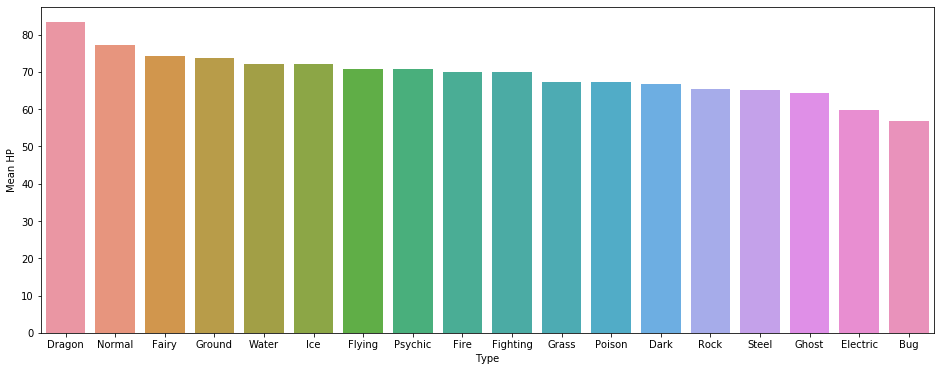

In [6]:
means = {"Mean HP": []}
for each_type in types.unique():
    means["Mean HP"].append(pokemon.loc[pokemon['Type 1'] == each_type]['HP'].mean())
    
means = pd.DataFrame(means)
means.insert(0, "Type", [each_type for each_type in types.unique()])
print(means)
    
plt.figure(figsize=(16,6))
ax = sns.barplot(data = means.sort_values('Mean HP', ascending = False), x = "Type", y = "Mean HP")
print(pokemon.head())

     #     Name  Rel Index   Type 1  Type 2  Total   HP  Attack  Defense  \
0  480     Uxie        735  Psychic     NaN    580   75      75      130   
1  481  Mesprit        736  Psychic     NaN    580   80     105      105   
2  482    Azelf        737  Psychic     NaN    580   75     125       70   
3  483   Dialga        738    Steel  Dragon    680  100     120      120   
4  484   Palkia        739    Water  Dragon    680   90     120      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       75      130     95           4       True  
1      105      105     80           4       True  
2      125       70    115           4       True  
3      150      100     90           4       True  
4      150      120    100           4       True  


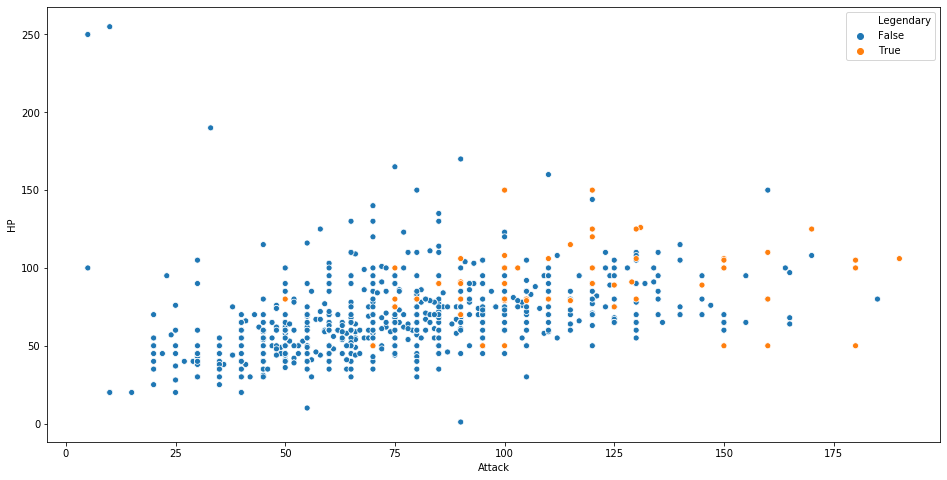

In [7]:
leg_pok = pokemon.loc[pokemon["Legendary"] == True].reset_index()
print(leg_pok.head())
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="Attack", y = "HP", hue ='Legendary', data = pokemon)


In [8]:
reg_pok = pokemon.loc[pokemon["Legendary"] == False].reset_index()
x_set = reg_pok.loc[reg_pok["Rel Index"] < 600].append(leg_pok.loc[leg_pok['Rel Index'] < 780])

x_train=x_set[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
y_train=x_set["Legendary"]

clf.fit(x_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
x_t_set = reg_pok.loc[reg_pok["Rel Index"] >= 600].append(leg_pok.loc[leg_pok['Rel Index'] >= 780])
x_test = x_t_set[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
y_test = x_t_set["Legendary"]


prediction = clf.predict(x_t_set[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])
y_test = y_test.values

accuracy = 0
correct = 0
total = 0

for i in range(len(prediction)):
    print("Prediction: ", prediction[i], " Actual:", y_test[i])
    if(prediction[i] == y_test[i]):
        correct += 1
    total += 1
accuracy = correct/total
print(correct, " correct out of", total)
print(accuracy)


Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  False  Actual: False
Prediction:  F

In [14]:
confusion_matrix(y_test, prediction)

array([[129,   6],
       [  8,  12]], dtype=int64)